In [0]:
import torch

a = torch.rand(3,3,3).cuda()

b = a+a

print(a)
print(b)

tensor([[[0.7259, 0.3145, 0.6399],
         [0.5355, 0.9109, 0.9394],
         [0.7884, 0.0701, 0.9665]],

        [[0.2882, 0.9287, 0.5589],
         [0.4172, 0.9645, 0.3099],
         [0.8285, 0.3648, 0.0829]],

        [[0.3364, 0.5747, 0.5993],
         [0.4854, 0.0220, 0.7324],
         [0.3287, 0.1712, 0.3098]]], device='cuda:0')
tensor([[[1.4518, 0.6290, 1.2799],
         [1.0709, 1.8219, 1.8789],
         [1.5769, 0.1401, 1.9331]],

        [[0.5765, 1.8573, 1.1178],
         [0.8344, 1.9291, 0.6198],
         [1.6569, 0.7296, 0.1658]],

        [[0.6727, 1.1494, 1.1987],
         [0.9708, 0.0440, 1.4648],
         [0.6574, 0.3424, 0.6195]]], device='cuda:0')


Saving system.jpg to system (1).jpg


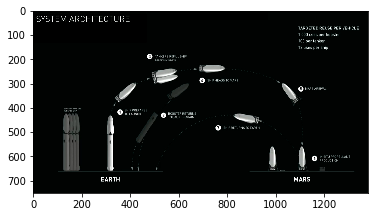

In [33]:
from PIL import Image
from google.colab import files
from io import BytesIO

uploaded = files.upload()
im = Image . open(BytesIO(uploaded[list(uploaded.keys())[0]]))

import matplotlib. pyplot as plt
plt.imshow(im)

In [0]:
import torch
import torch.nn as nn
HAS_CUDA = torch.cuda.is_available()
device = torch.device ('cuda') if HAS_CUDA else torch.device ('cpu')
x_train = torch.rand (10000 , 2). to ( device )
y_train = torch.pow ( x_train [... ,0 , None ] , 3) * x_train [... ,1 , None ]
x_test = torch.rand (10 , 2). to ( device )
y_test = torch.pow ( x_test [... ,0 , None ] , 3) * x_test [... ,1 , None ]
model = nn.Sequential (*[
  nn.Linear(2,10) ,
  nn.Sigmoid() ,
  nn.Linear(10,10) ,
  nn.Sigmoid() ,
  nn.Linear(10,10) ,
  nn.Sigmoid() ,
  nn.Linear(10,1) ,
  nn.Sigmoid(),
]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr =1e-2)
loss_fn = nn.MSELoss()
with torch.no_grad():
  print ( " y_test " )
  print(y_test.t())
  print ( "y_test_hat before training " )
  print(model ( x_test ).t())
for i in range(10000):
  optimizer.zero_grad()
  y_train_hat = model( x_train )
  loss = loss_fn( y_train_hat , y_train )
  loss.backward()
  optimizer.step()

with torch.no_grad():
  print( " y_test " )
  print( y_test.t())
  print( " y_test_hat after training " )
  print( model( x_test ).t())

 y_test 
tensor([[4.7927e-03, 1.4220e-01, 4.0444e-02, 4.8827e-02, 9.1338e-01, 1.3422e-02,
         2.6425e-01, 8.9358e-03, 2.4101e-02, 3.3477e-05]], device='cuda:0')
y_test_hat before training 
tensor([[0.4572, 0.4571, 0.4572, 0.4572, 0.4571, 0.4572, 0.4571, 0.4572, 0.4571,
         0.4572]], device='cuda:0')
 y_test 
tensor([[4.7927e-03, 1.4220e-01, 4.0444e-02, 4.8827e-02, 9.1338e-01, 1.3422e-02,
         2.6425e-01, 8.9358e-03, 2.4101e-02, 3.3477e-05]], device='cuda:0')
 y_test_hat after training 
tensor([[4.7130e-03, 1.4262e-01, 4.0745e-02, 4.8720e-02, 9.1380e-01, 1.3106e-02,
         2.6369e-01, 8.7432e-03, 2.4239e-02, 8.0097e-04]], device='cuda:0')
